In [1]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import copy
from scipy.optimize import curve_fit as cf
import scipy.stats as sct

In [2]:
def func(x,t):
    return 1 - np.exp(-x/t)

In [3]:
def ecdf1(d):
    x=np.sort(d)
    n=x.size
    y=np.arange(1,n+1)/n
    return (x,y)

In [4]:
def ecdf2(d):
    x=np.sort(d)
    n=x.size
    xx=[0]
    yy=[0]
    for i in range(len(x)):
        yy.append(i/n)
        yy.append((i+1)/n)
        xx.append(x[i])
        xx.append(x[i])
    xx.insert(len(xx),xx[-1]+(xx[-1]-xx[-3]))
    yy.insert(len(yy),1)
    xx=np.array(xx)
    yy=np.array(yy)
    return (xx,yy)

In [5]:
def bootstrap(times, niter=100, test_size=0.3, rstate=0, pcut=0.05):
    
    np.random.seed(rstate)
    fitted = np.zeros((niter))
    
    count=0
    fit_size = int((1-test_size)*len(times))
    
    while count < niter:
        ftimes = np.random.choice(times, fit_size)
        
        xx, yy = ecdf1(ftimes)
        tau = cf(func, xx, yy)[0][0]
        
        fyy = func(xx, tau)
        ks = sct.ks_2samp(fyy, yy)[1]
        
        if ks >= pcut:
            fitted[count] = tau
            count += 1
            
    return fitted

## t217v

In [6]:
t217v_utimes = np.loadtxt('files_for_unbiased_times/unbiased-times-t217v-allo-apo.txt')

t217v_x1, t217v_y1 = ecdf1(t217v_utimes)
t217v_fitted_tau = cf(func, t217v_x1, t217v_y1)[0][0]

t217v_fitted_y = func(t217v_x1, t217v_fitted_tau)

t217v_ks = sct.ks_2samp(t217v_fitted_y, t217v_y1)

t217v_fitted_tau, t217v_ks

(16.107926998312983, KstestResult(statistic=0.16, pvalue=0.5486851446031328))

/tmp/ipykernel_47054/4221098991.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,)


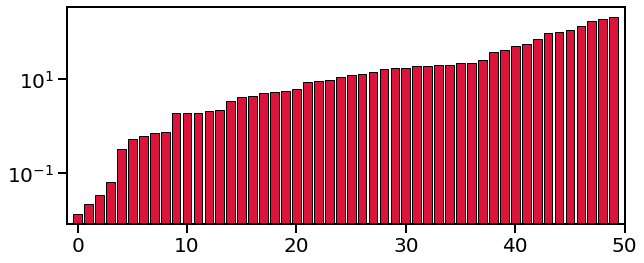

In [18]:
curve = t217v_utimes
oname='raw_times_t217v'
#
fig,ax=plt.subplots(1, figsize=(10,4))
ax.bar(range(len(curve)), curve[curve.argsort()], color='crimson', edgecolor='black')
ax.set_yscale('log')
ax.set_xlim(-1,50)
ax.set_ylim(0,)
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

In [7]:
t217v_x2, t217v_y2 = ecdf2(t217v_utimes)

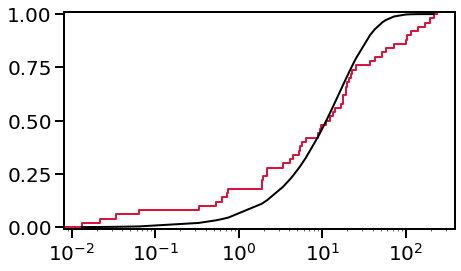

In [30]:
curve = t217v_utimes
oname='fitted_times_t217v'
#
fig,ax=plt.subplots(1, figsize=(7,4))
ax.plot(t217v_x2,t217v_y2, lw=2, color='crimson')
ax.plot(t217v_x1, t217v_fitted_y, lw=2, color='black')
ax.set_xscale('log')
ax.set_ylim(-0.01,1.01)
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

## l166a

In [8]:
l166a_utimes = np.loadtxt('files_for_unbiased_times/unbiased-times-l166a.txt')

l166a_x1, l166a_y1 = ecdf1(l166a_utimes)
l166a_fitted_tau = cf(func, l166a_x1, l166a_y1)[0][0]

l166a_fitted_y = func(l166a_x1, l166a_fitted_tau)

l166a_ks = sct.ks_2samp(l166a_fitted_y, l166a_y1)

l166a_fitted_tau, l166a_ks

(0.17156765669984333,
 KstestResult(statistic=0.07017543859649122, pvalue=0.9991935374745595))

/tmp/ipykernel_47054/2659175642.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,)


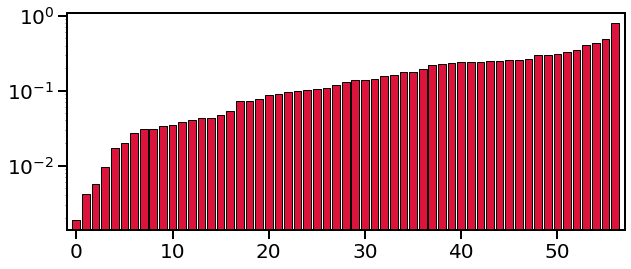

In [27]:
curve = l166a_utimes
oname='raw_times_l166a'
#
fig,ax=plt.subplots(1, figsize=(10,4))
ax.bar(range(len(curve)), curve[curve.argsort()], color='crimson', edgecolor='black')
ax.set_yscale('log')
ax.set_xlim(-1,57)
ax.set_ylim(0,)
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

In [9]:
l166a_x2, l166a_y2 = ecdf2(l166a_utimes)

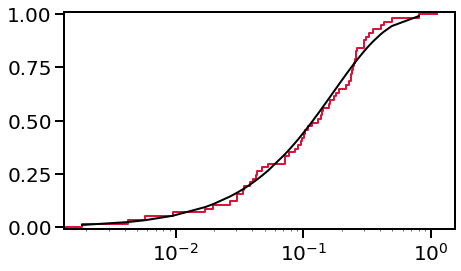

In [31]:
curve = l166a_utimes
oname='fitted_times_l166a'
#
fig,ax=plt.subplots(1, figsize=(7,4))
ax.plot(l166a_x2,l166a_y2, lw=2, color='crimson')
ax.plot(l166a_x1, l166a_fitted_y, lw=2, color='black')
ax.set_xscale('log')
ax.set_ylim(-0.01,1.01)
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

## f163a allo-both

In [10]:
f163a_utimes = np.loadtxt('files_for_unbiased_times/unbiased-times-f163-allo-both.txt')

f163a_x1, f163a_y1 = ecdf1(f163a_utimes)
f163a_fitted_tau = cf(func, f163a_x1, f163a_y1)[0][0]

f163a_fitted_y = func(f163a_x1, f163a_fitted_tau)

f163a_ks = sct.ks_2samp(f163a_fitted_y, f163a_y1)

f163a_fitted_tau, f163a_ks

(12.384844260698046, KstestResult(statistic=0.16, pvalue=0.5486851446031328))

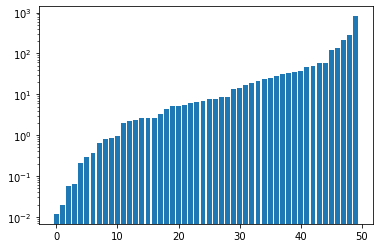

In [15]:
fig,ax=plt.subplots()
ax.bar(range(len(f163a_utimes)), f163a_utimes[f163a_utimes.argsort()])
ax.set_yscale('log')
plt.show()

In [11]:
f163a_x2, f163a_y2 = ecdf2(f163a_utimes)

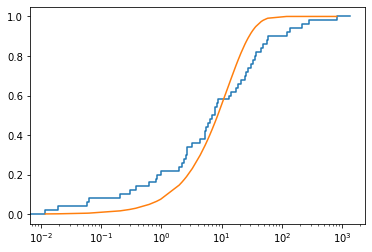

In [17]:
plt.plot(f163a_x2,f163a_y2)
plt.plot(f163a_x1, f163a_fitted_y)
plt.xscale('log')

## f163a allo-bound

In [12]:
f163a_utimes = np.loadtxt('files_for_unbiased_times/unbiased-times-f163-allo-bound.txt')

f163a_x1, f163a_y1 = ecdf1(f163a_utimes)
f163a_fitted_tau = cf(func, f163a_x1, f163a_y1)[0][0]

f163a_fitted_y = func(f163a_x1, f163a_fitted_tau)

f163a_ks = sct.ks_2samp(f163a_fitted_y, f163a_y1)

f163a_fitted_tau, f163a_ks

(13.116336880038562, KstestResult(statistic=0.22, pvalue=0.17858668181221732))

/tmp/ipykernel_47054/266435079.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,)


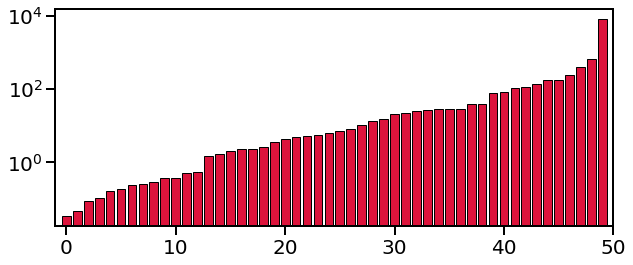

In [35]:
curve = f163a_utimes
oname='raw_times_lf163a'
#
fig,ax=plt.subplots(1, figsize=(10,4))
ax.bar(range(len(curve)), curve[curve.argsort()], color='crimson', edgecolor='black')
ax.set_yscale('log')
ax.set_xlim(-1,50)
ax.set_ylim(0,)
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

In [13]:
f163a_x2, f163a_y2 = ecdf2(f163a_utimes)

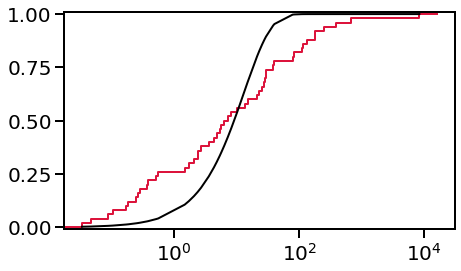

In [37]:
curve = f163a_utimes
oname='fitted_times_f163a'
#
fig,ax=plt.subplots(1, figsize=(7,4))
ax.plot(f163a_x2,f163a_y2, lw=2, color='crimson')
ax.plot(f163a_x1, f163a_fitted_y, lw=2, color='black')
ax.set_xscale('log')
ax.set_ylim(-0.01,1.01)
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

In [14]:
data = [l166a_utimes, f163a_utimes, t217v_utimes]
data = [bootstrap(d) for d in data]
data = np.mean(data, axis=1), np.std(data, axis=1)

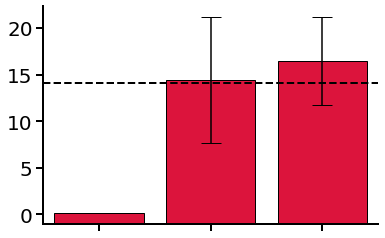

In [73]:
fig,ax=plt.subplots(1, figsize=(6,4))
ax.bar(range(3), data[0]+1, bottom=-1, yerr=data[1], color='crimson', edgecolor='black', capsize=10)
ax.plot([-0.5,2.5],[14.1,14.1], '--', lw=2, color='black')
ax.set_xlim(-0.5,2.5)
ax.set_ylim(-1,)
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom', 'left']].set_linewidth(2)
ax.tick_params(length=7, width=2, labelsize=20, labelbottom=False)
# #
plt.savefig(f'saved_plots/residence_times.pdf', transparent=True)
plt.show()

In [15]:
data

(array([ 0.16756138, 14.41994333, 16.4705231 ]),
 array([0.02636999, 6.77854019, 4.72783395]))